# Predicting Wine Quality

Project goals:
- Predict the quality of wine while incorporating KMeans Clustering

## Imports

In [1]:
import wrangle as w
import explore as e
import model as m

import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

from scipy import stats


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Wrangle

Data acquired from [data.world](https://data.world/food/wine-quality)

- 6,497 rows/wine scores
- 1,177 duplicate wines dropped from data
- Saw no missing values
- Saw minor outliers, but kept them


In [3]:
df = w.wrangle()

## Explore

Goal: Find drivers of wine quality

Key Insights:
- Strongest Drivers of quality:
    - alcohol
    - density
    - volatile acidity
    - chlorides

Split data to avoid data leakage
- 70/15/15 split

In [4]:
train, validate, test = w.split_data(df)

**Which features improve quality?**

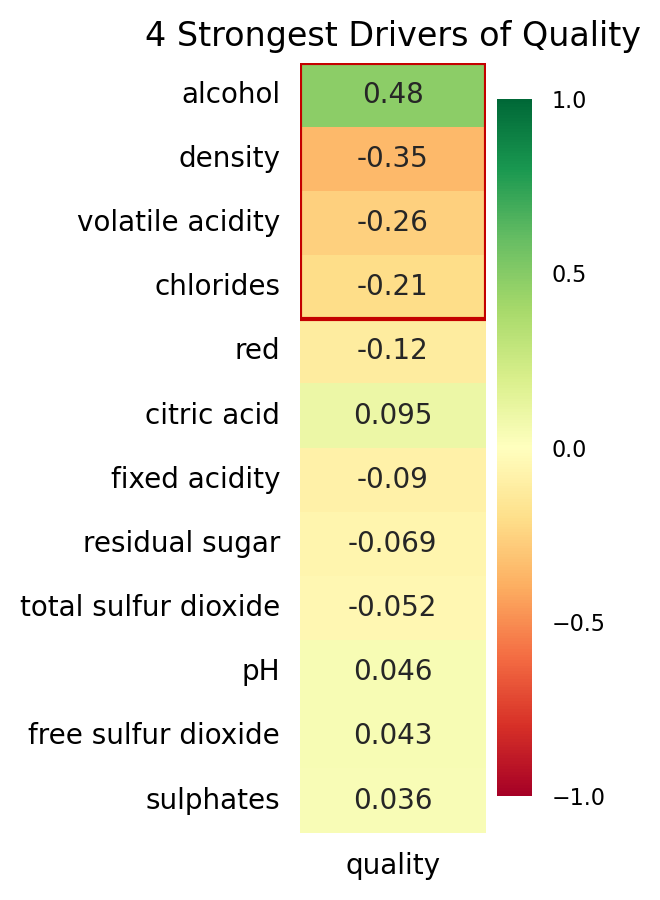

In [5]:
e.plot_key_features(train)

Correlation test for each feature:

For a significance level of .05, we can conclude that each feature has some linear relationship to quality.

In [6]:
for col in ['alcohol', 'density', 'volatile acidity', 'chlorides', 'citric acid',
               'fixed acidity', 'residual sugar', 'total sulfur dioxide', 'pH',
               'free sulfur dioxide', 'sulphates']:
    r_stat, p_val = stats.pearsonr(train['quality'], train[col])
    print(round(p_val,2))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.01
0.03


**How do quality and alcohol relate?**

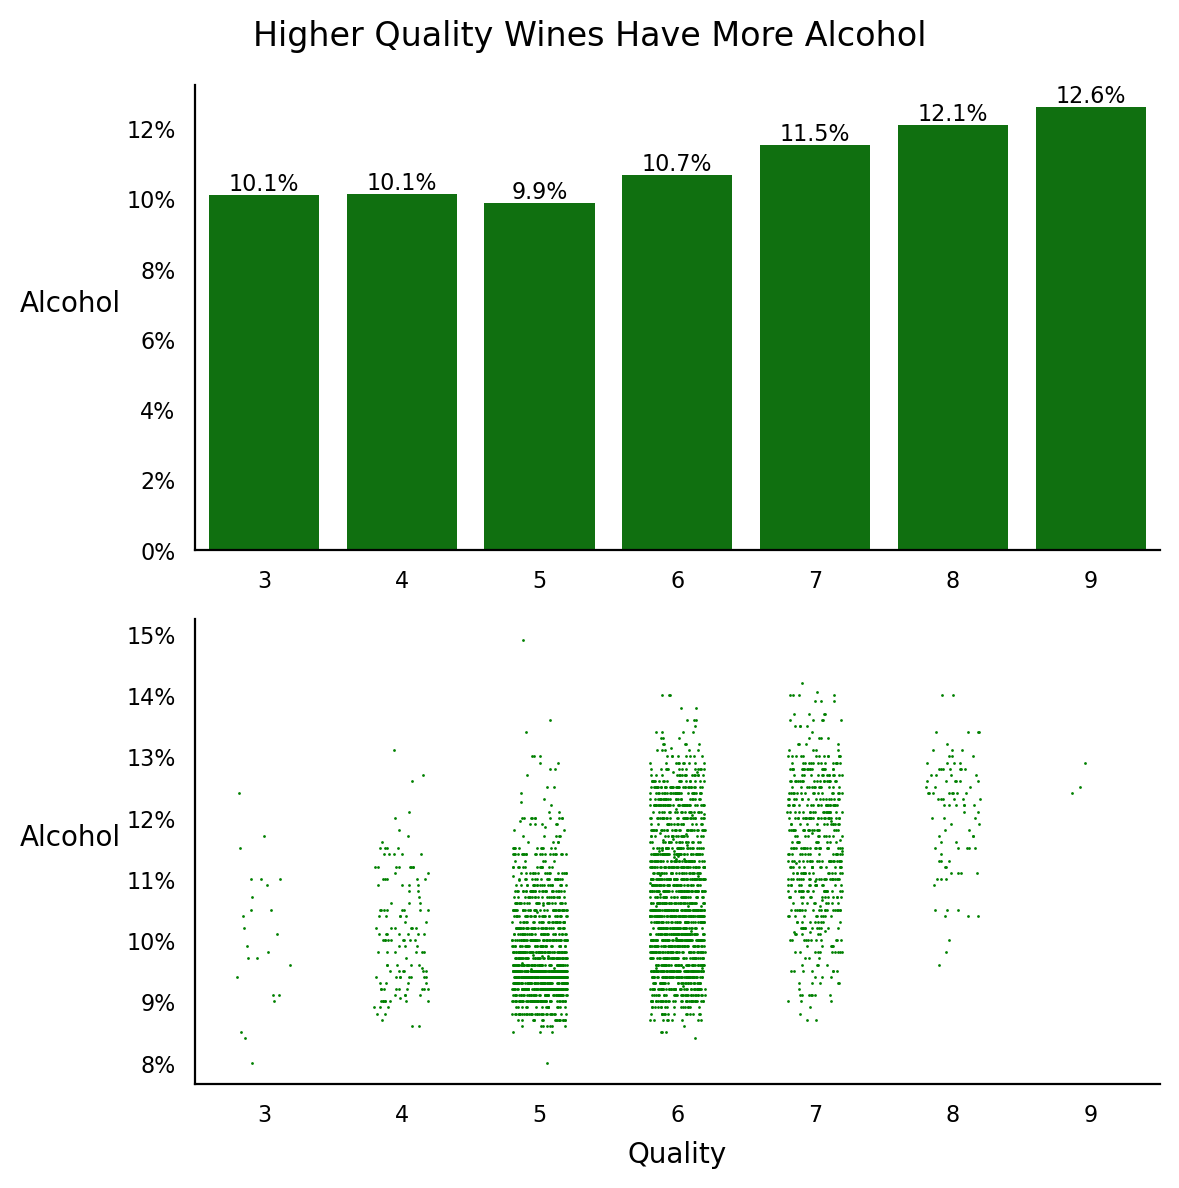

In [7]:
e.plot_alcohol_by_quality(train)

## Clustering

Goal: Find groups that may be useful in predicting quality

First group of clusters: 

Kmeans clustering method on `fixed acidity`, `alcohol`, and `chlorides`

![Cluster1](clusters1.png)

Quality by 4 groups of clusters

In [8]:
train, validate, test = m.preprecess_data(df)
train.groupby('clusters_1')['quality'].mean()

clusters_1
0    5.611446
1    5.411569
2    6.483333
3    5.882705
Name: quality, dtype: float64

Cluster 2: wines with more alcohol and less acidity and chlorides.

Second group of clusters: 

Kmeans clustering method on `fixed acidity` and `alcohol`

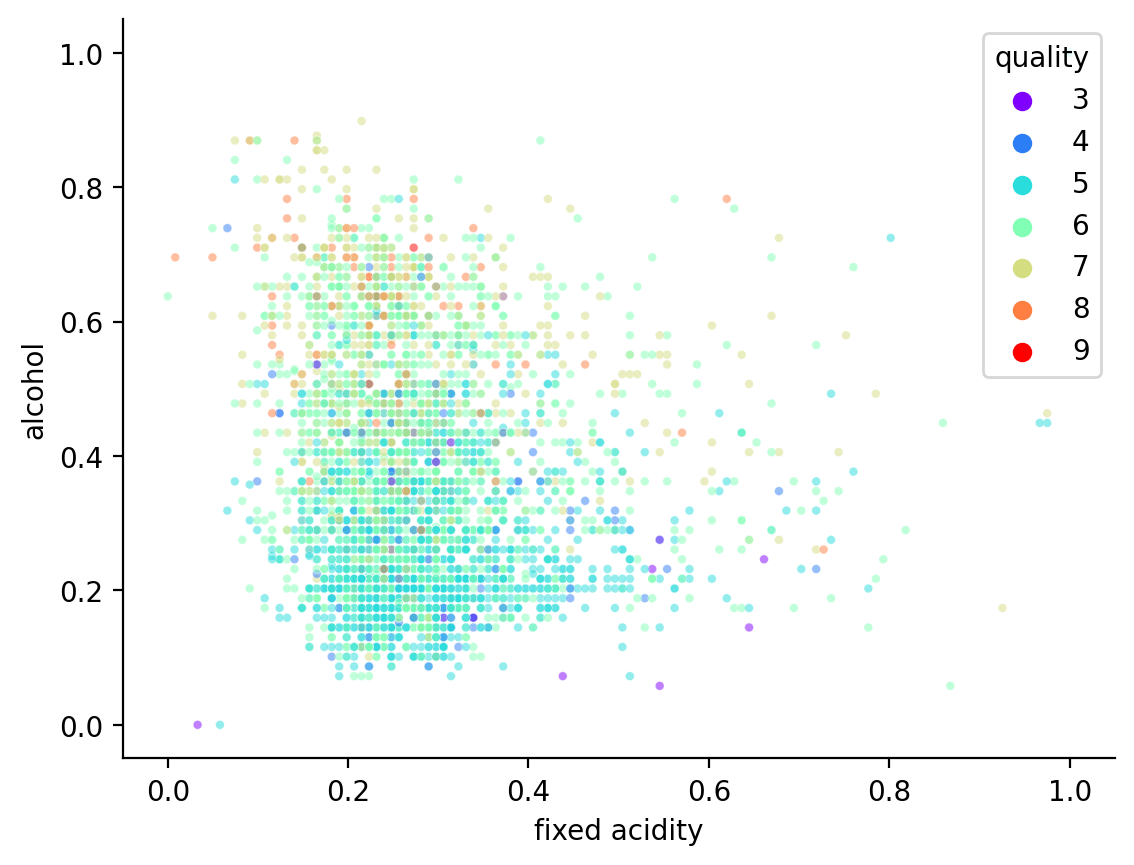

In [9]:
sns.scatterplot(data=train, x='fixed acidity', y='alcohol', hue='quality',
                    s=10, alpha=.5, palette='rainbow')
sns.despine()
plt.show()

Quality by 4 groups of clusters

In [10]:
train.groupby('clusters_2')['quality'].mean()

clusters_2
0    5.408847
1    5.881803
2    6.483333
3    5.613095
Name: quality, dtype: float64

Cluster 2: high alcohol, low acidic wines.

## Modeling: Regression

Goal: Model on key drivers and then on clusters

Key drivers: `alcohol`, `volatile acidity`, `chlorides`

Preprocessing: Scaled numeric features, created clusters and encoded clusters.

In [11]:
train, validate, test = m.preprecess_data(df)

### Baseline Regression model

`DummyRegressor`, which makes every prediction 5.8, the mean quality score.

RMSE = 0.88, R2 = 0

In [12]:
m.run_baseline_model(train, validate,
                     features=['alcohol', 'volatile acidity', 'chlorides'], target=['quality'])

Train:	RMSE = 0.877247065526987	R2 = 0.0
Test:	RMSE = 0.8709556563730244	R2 = -0.004223135332819483


(0.877247065526987, 0.0, 0.8709556563730244, -0.004223135332819483)

### Best model without clusters

Linear Regression model with an RMSE of 0.75 and an R2 of 0.26

In [13]:
m.run_linear_model(train, validate,
                   features=['alcohol', 'volatile acidity', 'chlorides'], target=['quality'])

Train:	RMSE = 0.7398947098676343	R2 = 0.2886292628795276
Test:	RMSE = 0.7464181576392369	R2 = 0.2624312195350209


(0.7398947098676343,
 0.2886292628795276,
 0.7464181576392369,
 0.2624312195350209)

### Best model with clusters

Include feature that identifies cluster 2 in the second group of clusters.
- indicates whether the wine has more alcohol and less acidity and chlorides.

Linear Regression model with an RMSE of 0.75 and an R2 of 0.26

In [14]:
m.run_linear_model(train, validate,
                   features=['alcohol', 'volatile acidity', 'chlorides', 'clusters_2_0'],
                   target=['quality'])

Train:	RMSE = 0.7397021358155124	R2 = 0.28899951479789776
Test:	RMSE = 0.7465117684370821	R2 = 0.26224620599845816


(0.7397021358155124,
 0.28899951479789776,
 0.7465117684370821,
 0.26224620599845816)

### Modeling Wrap

* Our linear regression models quality predictions beat our baseline predictions by .12
* Clusters did not improve our linear models' performance

## Conclusion

### Summary
- Strongest Drivers of quality:
    - alcohol
    - density
    - volatile acidity
    - chlorides
- Linear regression model predictions beat baseline model predictions by .12. 
- Clustering didn't help our models.
    - Clusters that showed higher quality were groups of wine that contained more alcohol

### Recommendations and Next Steps
- Emphasize alcohol, volatile acidity, and chlorides in during feature engineering for any future modeling attempts
- Consider predicting without clusters

With more time, we can:
- Do multivariate analysis and see how a combination or columns relate to quality 
- Make Machine Learning classification models that classify whether the wine will score 5 or less, 6, or 7 or more.